In [49]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt




In [50]:
def extract_scores(file_path):
    scores_dict = {}
    
    try:
        df = pd.read_csv(file_path)
        
        # Filter rows based on 'Metric' column
        metrics_df = df[df['Metric'].isin(['valid_f_score', 'valid_auroc'])]

        # Extract values
        valid_f_score = float(metrics_df[metrics_df['Metric'] == 'valid_f_score']['Last_Value'].values[0])
        valid_auroc = float(re.search(r'\d+\.\d+', metrics_df[metrics_df['Metric'] == 'valid_auroc']['Last_Value'].values[0]).group())
        
        return valid_f_score, valid_auroc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None



In [82]:
import pandas as pd
import re
import numpy as np
import ast

def extract_test_scores(file_path):
    try:
        df = pd.read_csv(file_path)

        # Extract values
        test_f_score = float(df.get('Test F-Score', [0])[0])
        test_auroc = float(re.search(r'\d+\.\d+', df.get('Test AUROC', [0])[0]).group())
        len_dataloader = int(df.get('Len Dataloader', [0])[0])
        confusion_matrix_str = df.get('Test confusion matrix', [''])[0]

        # Print the results
        print(f"Test F-Score: {test_f_score}")
        print(f"Test AUROC: {test_auroc}")
        print(f"Total Length of Dataloader: {len_dataloader}")

        # Print the confusion matrix string before attempting to evaluate it
        print(f"Confusion Matrix String: {confusion_matrix_str}")

        """
        # Convert the confusion matrix string to a numpy array using ast.literal_eval
        confusion_matrix = np.array(ast.literal_eval(confusion_matrix_str))

        # Calculate the percentage of each class in the confusion matrix
        class_percentages = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True) * 100

        print(f"Confusion Matrix:\n{confusion_matrix}")
        print("Class Percentages in Confusion Matrix:")
        for i, percentage in enumerate(class_percentages):
            print(f"Class {i}: {percentage[0]:.2f}%")
        
        
        """
        
        return test_f_score, test_auroc

    except KeyError as e:
        print(f"Error processing {file_path}: One or more expected columns not found.")
        print(f"Available columns in the DataFrame: {df.columns}")
        return None, None
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None





In [83]:
def process_csv_files(tf_list_path):
    with open(tf_list_path, 'r') as file:
        tf_list = [line.strip() for line in file]

    results_dict = {}
    
    for tf in tf_list:
        base_path = f"/mnt/raid1/thalassini/home/CNN_results_40_batch_128_chrom/{tf}/CNN3/"
        file_path = os.path.join(base_path, f"test_results.csv")
        
        test_f_score, test_auroc = extract_test_scores(file_path)
        
        if test_f_score is not None and test_auroc is not None:
            results_dict[tf] = {'test_f_score': test_f_score, 'test_auroc': test_auroc}

    return results_dict



In [84]:

tf_list_path = "/mnt/raid1/thalassini/home/Downloads/target_names_6.txt"
#base_path = f"CNN_results_balanced_kernels_100/{tf}"

results = process_csv_files(tf_list_path)

# for tf, scores in results.items():
#    print(f"{tf}: Valid F Score = {scores['valid_f_score']}, Valid AUROC = {scores['valid_auroc']}")

Test F-Score: 0.6908509659598152
Test AUROC: 0.7651
Total Length of Dataloader: 8827
Confusion Matrix String: [3582  698 1983 2564]
Test F-Score: 0.5264494766224943
Test AUROC: 0.5592
Total Length of Dataloader: 4596
Confusion Matrix String: [1190  849 1330 1227]
Test F-Score: 0.5279329871512428
Test AUROC: 0.5461
Total Length of Dataloader: 9262
Confusion Matrix String: [2011 2594 1739 2918]
Test F-Score: 0.7470413163608827
Test AUROC: 0.8113
Total Length of Dataloader: 9682
Confusion Matrix String: [4331  429 1959 2963]
Test F-Score: 0.5546148045813437
Test AUROC: 0.5815
Total Length of Dataloader: 2903
Confusion Matrix String: [930 534 745 694]
Test F-Score: 0.5024277068054326
Test AUROC: 0.5162
Total Length of Dataloader: 10987
Confusion Matrix String: [2301 3286 2129 3271]
Test F-Score: 0.4994537775996885
Test AUROC: 0.4757
Total Length of Dataloader: 2492
Confusion Matrix String: [731 863 408 490]
Test F-Score: 0.505222083909578
Test AUROC: 0.5111
Total Length of Dataloader: 5424

In [85]:
def plot_results(results, metric):
    tfs = list(results.keys())
    scores = [result[metric] for result in results.values()]

    fig, ax = plt.subplots(figsize=(15, 8))  # Adjust the figsize here

    ax.bar(tfs, scores, color='magenta')  # Set the color
    plt.xlabel('Transcription Factor')
    plt.ylabel(metric)
    plt.title(f'{metric} for each Transcription Factor')
    plt.xticks(rotation=45, ha='right')
    plt.show()

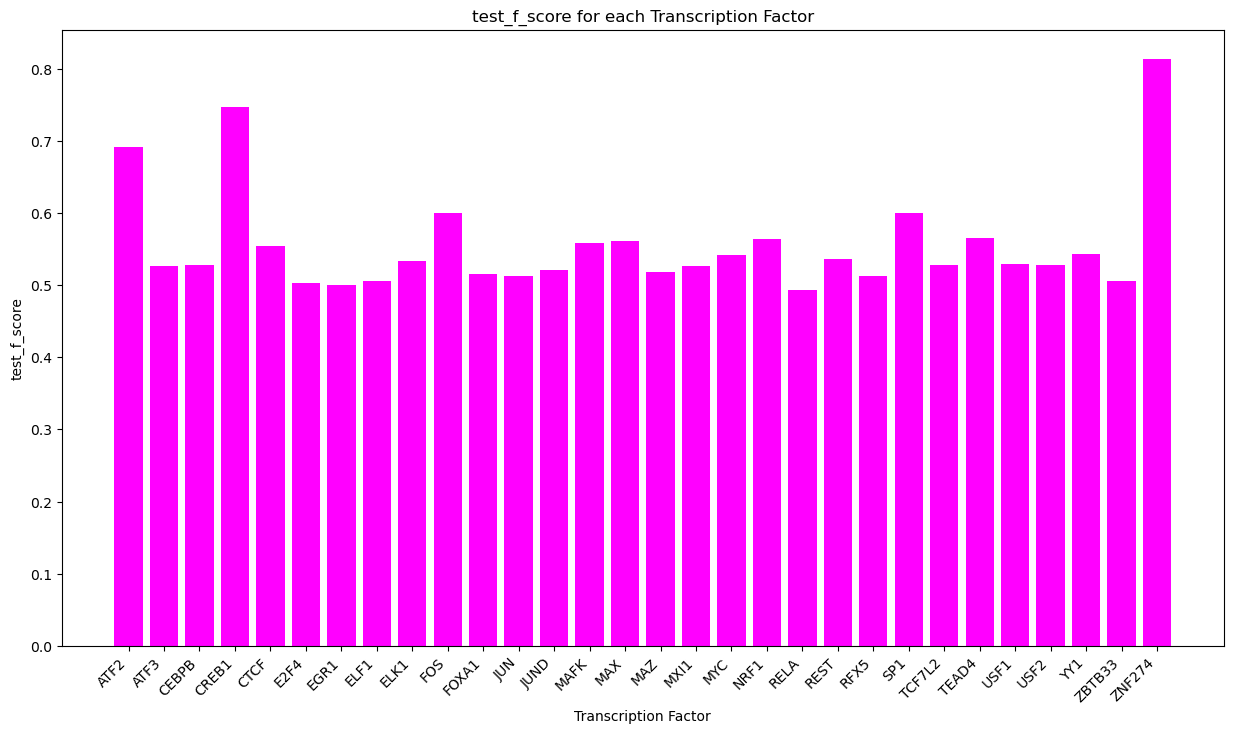

In [87]:
# Plot F-Score
plot_results(results, 'test_f_score')


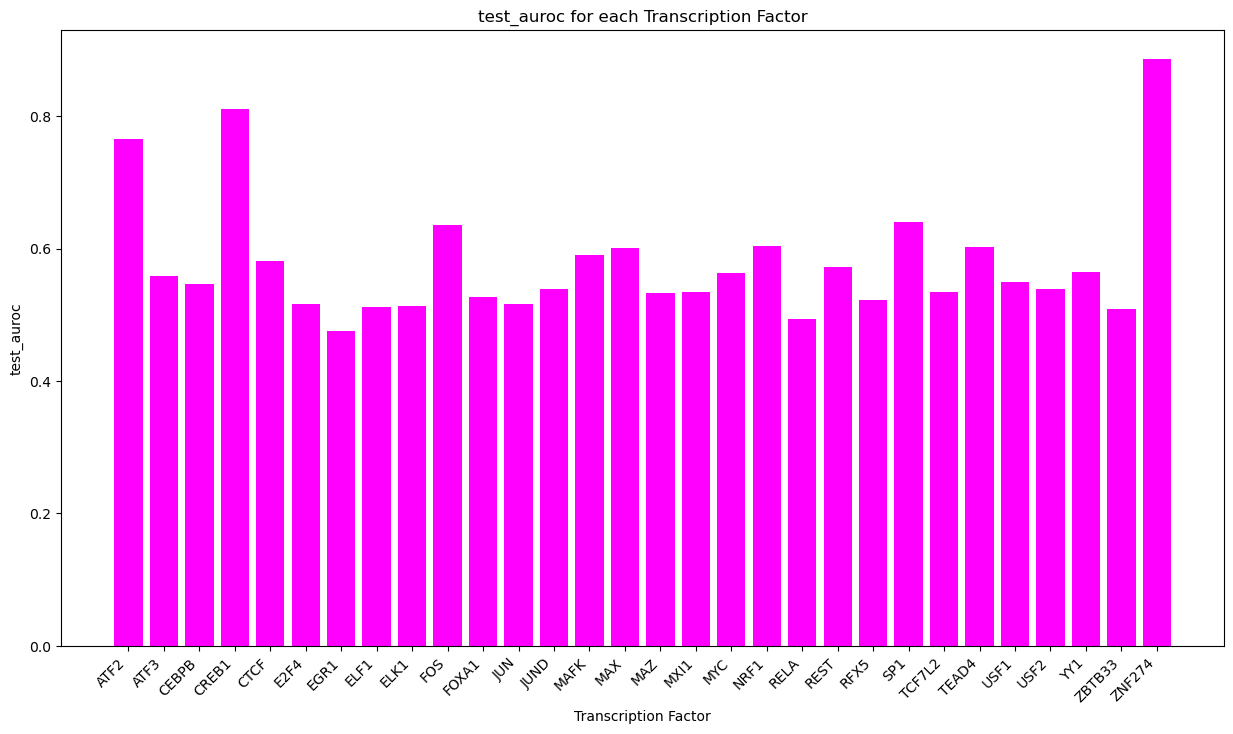

In [88]:
# Plot AUROC
plot_results(results, 'test_auroc')